In [2]:
import talib
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts
import os

In [3]:
TUSHARE_API_KEY = os.environ.get('TUSHARE_API_KEY')

# 获取股票数据
ts_pro = ts.pro_api(TUSHARE_API_KEY)
df = ts_pro.daily(ts_code='000001.SZ', start_date='20250101', end_date='20250513', fields='ts_code,trade_date,open,high,low,close,vol')
df['trade_date'] = pd.to_datetime(df['trade_date'])
df = df.reindex(index=df.index[::-1])
df.to_csv('data/000001.SZ.csv', index=False)

In [4]:
# 读取
df = pd.read_csv('data/000001.SZ.csv')
ma_df = talib.MA(df['close'], timeperiod=5)
ma_df

0        NaN
1        NaN
2        NaN
3        NaN
4     11.452
       ...  
79    10.976
80    10.992
81    11.026
82    11.076
83    11.142
Length: 84, dtype: float64

In [5]:
# 计算MA指标
ma5_df = talib.MA(df['close'], timeperiod=5)
ma10_df = talib.MA(df['close'], timeperiod=10)
ma20_df = talib.MA(df['close'], timeperiod=20)

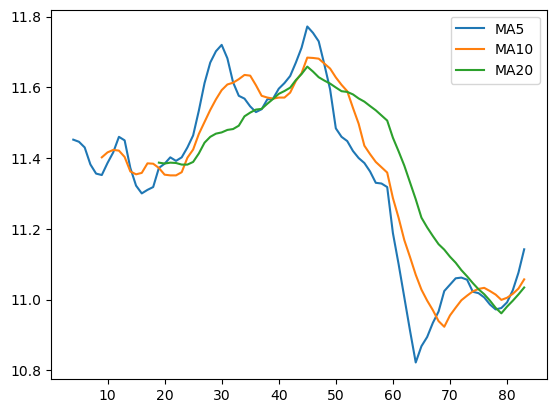

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ma5_df, label='MA5')
ax.plot(ma10_df, label='MA10')
ax.plot(ma20_df, label='MA20')
plt.legend()
plt.show()